In [3]:
#載入所需套件
import numpy as np
import pandas as pd

#載入過去五年0056歷史資料
data = pd.read_csv(r'C:\Users\npc94\OneDrive\桌面\0056.TW.csv',index_col=0,parse_dates=True)

#計算報酬。交易只看前一次的報酬，前一次報酬為正就買進股票反之則賣出股票
data['returns'] = np.log(data['Close']/data['Close'].shift(1))

#用相關對數報酬的正負號(1或-1)定義一個新欄位，得到的質就代表要建立的市場部位
data['position']=np.sign(data['returns'])

<AxesSubplot:title={'center':'return compare'}, xlabel='Date'>

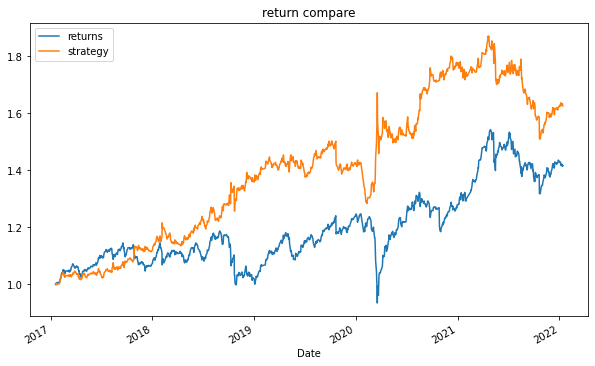

In [5]:
#根據所建立的市場部位計算出策略的對數報酬
data['strategy']=data['position'].shift(1)*data['returns']
#劃出策略績效表現的圖型並與本身進行比較
data[['returns','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6),title='return compare')

In [8]:
#計算策略的年化報酬
data[['returns','strategy']].mean()*252

returns     0.071710
strategy    0.100636
dtype: float64

In [9]:
#計算策略的風險
data[['returns','strategy']].std()

returns     0.008536
strategy    0.008334
dtype: float64

0.36214421678578224

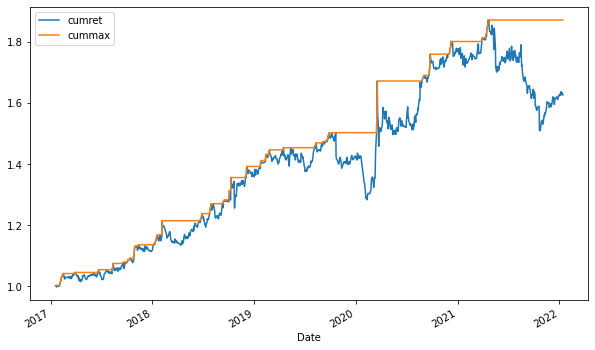

In [10]:
#計算策略的最大回檔
data['cumret']=data['strategy'].cumsum().apply(np.exp)
data['cummax']=data['cumret'].cummax()
data[['cumret','cummax']].dropna().plot(figsize=(10,6))
drawdown = data['cummax']-data['cumret']
drawdown.max()

In [11]:
#計算回檔持續的天數
temp = drawdown[drawdown ==0]
periods = (temp.index[1:].to_pydatetime()-temp.index[:-1].to_pydatetime())
periods.max()

datetime.timedelta(days=161)